In [1]:
from pandas import read_csv
from funciones import tipo_transferencia, heatmap_plot
transactions = read_csv("C:\\Users\\palej\\Desktop\\FIUBA\\Organizacion de datos\\TP\\transactions_train.csv")

In [2]:
analisis = transactions[ ["target", "ammount", "product_category", "feat_card_4"] ]

In [3]:
analisis = analisis.rename(columns={"target":"Transaccion", "ammount":"Monto", "product_category":"Tipo de producto", "feat_card_4":"Tarjeta"})

In [4]:
analisis.Transaccion = analisis.Transaccion.map(tipo_transferencia)

In [5]:
analisis.Tarjeta = analisis.Tarjeta.fillna("Otra")

In [6]:
analisis.Monto = analisis.Monto.fillna(0)

In [7]:
analisis = analisis.pivot_table(values="Monto", index="Transaccion", columns=["Tipo de producto", "Tarjeta"], aggfunc=sum)

C:\Users\palej\AppData\Local\Temp\ipykernel_13008\3921862449.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  analisis = analisis.pivot_table(values="Monto", index="Transaccion", columns=["Tipo de producto", "Tarjeta"], aggfunc=sum)


In [8]:
analisis = analisis.fillna(0)

In [9]:
analisis = analisis.T

In [10]:
analisis["Fraude en %"] = round(analisis.Fraude * 100 / (analisis.Fraude + analisis.Legal), 2)

In [11]:
analisis["Legal en %"] = round(analisis.Legal * 100 / (analisis.Fraude + analisis.Legal), 2)

In [12]:
analisis.pop("Fraude")

Tipo de producto  Tarjeta         
C                 Otra                    289.290
                  american express        155.184
                  mastercard           126123.952
                  visa                 203884.883
H                 Otra                    300.000
                  american express      14338.000
                  discover               5120.000
                  mastercard            72108.000
                  visa                 131006.000
R                 Otra                    250.000
                  american express      20550.000
                  discover               7675.000
                  mastercard            86950.000
                  visa                 178125.000
S                 american express       2575.000
                  discover               4097.000
                  mastercard            13870.000
                  visa                  16579.000
W                 Otra                   3723.750
               

In [13]:
analisis.pop("Legal")

Tipo de producto  Tarjeta         
C                 Otra                2.646450e+03
                  american express    0.000000e+00
                  mastercard          8.781151e+05
                  visa                1.347068e+06
H                 Otra                3.650000e+02
                  american express    1.065590e+05
                  discover            3.653900e+04
                  mastercard          4.860120e+05
                  visa                1.356960e+06
R                 Otra                0.000000e+00
                  american express    1.130850e+06
                  discover            1.451750e+05
                  mastercard          1.045075e+06
                  visa                3.103025e+06
S                 american express    4.057095e+04
                  discover            2.716925e+04
                  mastercard          9.653695e+04
                  visa                2.635700e+05
W                 Otra                1.512059e

In [14]:
analisis

Transaccion                        Fraude en %  Legal en %
Tipo de producto Tarjeta                                  
C                Otra                     9.85       90.15
                 american express       100.00        0.00
                 mastercard              12.56       87.44
                 visa                    13.15       86.85
H                Otra                    45.11       54.89
                 american express        11.86       88.14
                 discover                12.29       87.71
                 mastercard              12.92       87.08
                 visa                     8.80       91.20
R                Otra                   100.00        0.00
                 american express         1.78       98.22
                 discover                 5.02       94.98
                 mastercard               7.68       92.32
                 visa                     5.43       94.57
S                american express         5.97       94.03
                 discover                13.10       86.90
                 mastercard              12.56       87.44
                 visa                     5.92       94.08
W                Otra                     2.40       97.60
                 discover                10.80       89.20
                 mastercard               2.38       97.62
                 visa                     3.13       96.87

<Axes: title={'center': 'Promedio de montos'}, xlabel='Transaccion', ylabel='Tipo de producto-Tarjeta'>

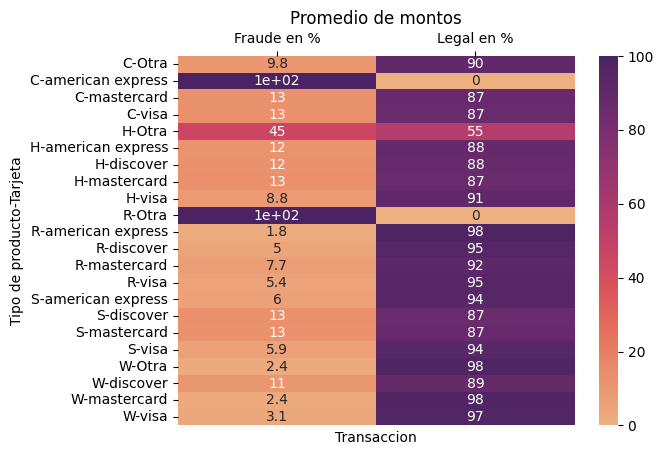

In [15]:
heatmap_plot(analisis)